# Imports

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Manipulation, Linear Algebraa
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Viz for missing values
import missingno as mno

# Data Preprocessing / Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics

# Data Preprocessing

## Loading Data

In [2]:
# Load the training and testing data
train = pd.read_csv("../input/tabular-playground-series-aug-2022/train.csv")
test = pd.read_csv("../input/tabular-playground-series-aug-2022/test.csv")

## Basic Analysis

In [3]:
# View train data
train.head(5)

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [4]:
# View test data
test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [5]:
# Train and test data shape
train.shape, test.shape

((26570, 26), (20775, 25))

In [6]:
# View the data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [7]:
# View the data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20775 non-null  int64  
 1   product_code    20775 non-null  object 
 2   loading         20552 non-null  float64
 3   attribute_0     20775 non-null  object 
 4   attribute_1     20775 non-null  object 
 5   attribute_2     20775 non-null  int64  
 6   attribute_3     20775 non-null  int64  
 7   measurement_0   20775 non-null  int64  
 8   measurement_1   20775 non-null  int64  
 9   measurement_2   20775 non-null  int64  
 10  measurement_3   20446 non-null  float64
 11  measurement_4   20366 non-null  float64
 12  measurement_5   20267 non-null  float64
 13  measurement_6   20151 non-null  float64
 14  measurement_7   20055 non-null  float64
 15  measurement_8   19929 non-null  float64
 16  measurement_9   19871 non-null  float64
 17  measurement_10  19708 non-null 

## Checking for Null Values

In [8]:
# Null values in train data
train.isnull().sum()

id                   0
product_code         0
loading            250
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      381
measurement_4      538
measurement_5      676
measurement_6      796
measurement_7      937
measurement_8     1048
measurement_9     1227
measurement_10    1300
measurement_11    1468
measurement_12    1601
measurement_13    1774
measurement_14    1874
measurement_15    2009
measurement_16    2110
measurement_17    2284
failure              0
dtype: int64

In [9]:
# Null values in test data
test.isnull().sum()

id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

<AxesSubplot:>

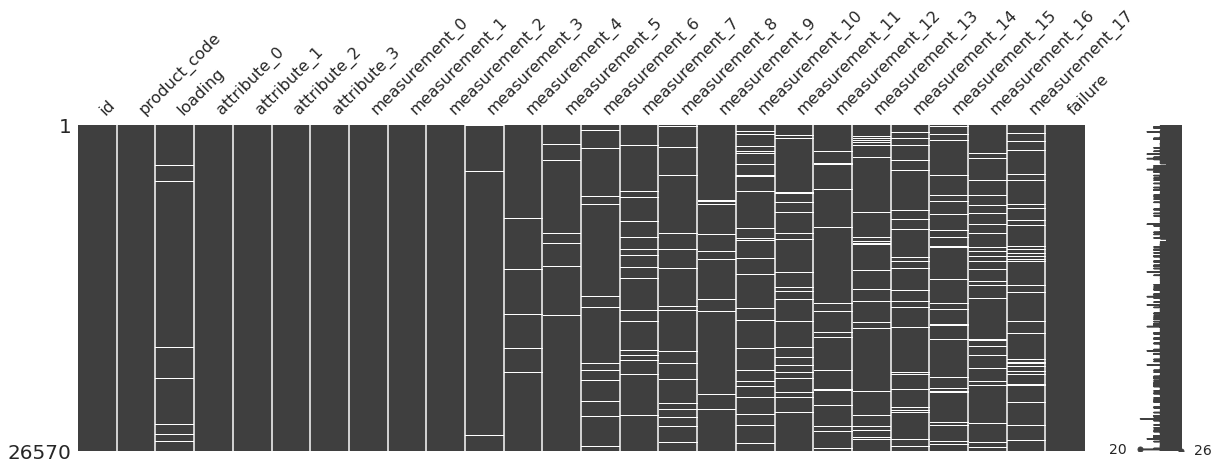

In [10]:
# Viz training missing data
mno.matrix(train, figsize = (20, 6))

<AxesSubplot:>

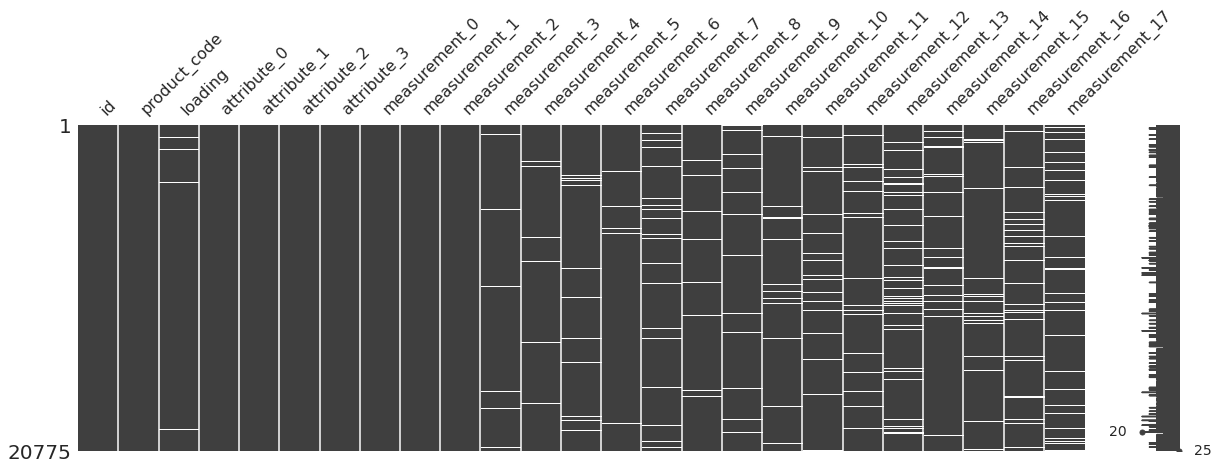

In [11]:
# Viz testing missing data
mno.matrix(test, figsize = (20, 6))

## Dropping Columns

In [12]:
# Drop columns
train.drop(["id", "product_code", "attribute_0", "attribute_1"], axis=1, inplace=True)
test.drop(["id", "product_code", "attribute_0", "attribute_1"], axis=1, inplace=True)

## Imputing Missing Values

In [13]:
# Getting list of columns with null values
null_cols = list(train.columns[train.isnull().any()])
null_cols

['loading',
 'measurement_3',
 'measurement_4',
 'measurement_5',
 'measurement_6',
 'measurement_7',
 'measurement_8',
 'measurement_9',
 'measurement_10',
 'measurement_11',
 'measurement_12',
 'measurement_13',
 'measurement_14',
 'measurement_15',
 'measurement_16',
 'measurement_17']

In [14]:
# Counting the number of columns with null values
len(null_cols)

16

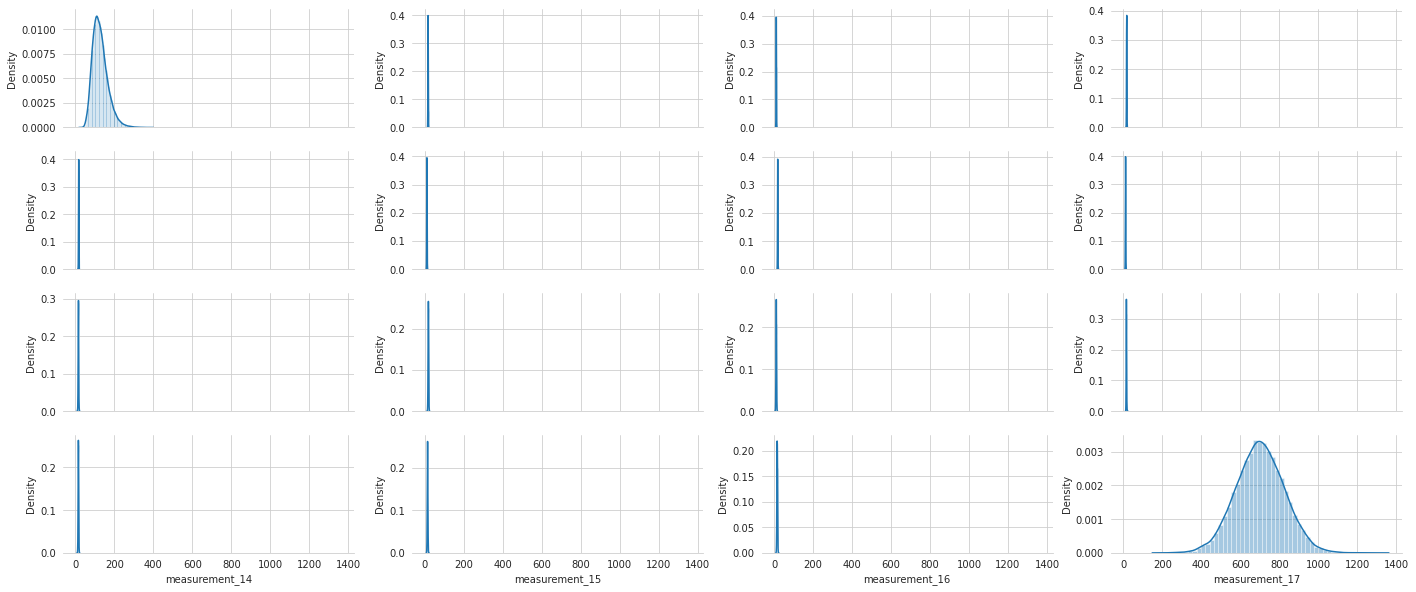

In [15]:
# Set up the matplotlib figure
f, axes = plt.subplots(4, 4, sharex=True, figsize=(24, 10))
sns.despine(left=True)

col_num = 0
for i in range(4):
    for j in range(4):
        sns.distplot(train[null_cols[col_num]], kde=True, ax=axes[i, j])
        col_num += 1

plt.show()

In [16]:
# Initializing the imputer
median_imp = SimpleImputer(missing_values=np.nan, strategy='median')

# Imputing the null values
train[null_cols[0]] = median_imp.fit_transform(train[null_cols[0]].values.reshape(-1, 1))
test[null_cols[0]] = median_imp.transform(test[null_cols[0]].values.reshape(-1, 1))

In [17]:
# Initializing the imputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Imputing the null values
for col in null_cols[1:]:
    train[col] = mean_imp.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = mean_imp.transform(test[col].values.reshape(-1, 1))

In [18]:
# View train data
train.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,80.10,9,5,7,8,4,18.040,12.518,15.748,19.292,...,10.672,15.859,17.594000,15.193,15.029,16.048444,13.034,14.684,764.100,0
1,84.89,9,5,14,3,3,18.213,11.540,17.717,17.893,...,12.448,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631,682.057,0
2,82.43,9,5,12,1,5,18.057,11.652,16.738,18.240,...,12.715,15.607,19.172085,13.798,16.711,18.631000,14.094,17.946,663.376,0
3,101.07,9,5,13,2,6,17.295,11.188,18.576,18.339,...,12.471,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172,826.282,0
4,188.06,9,5,9,2,8,19.346,12.950,16.990,15.746,...,10.337,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412,579.885,0


In [19]:
# View test data
test.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,119.57,6,4,6,9,6,19.305,10.178,17.534,18.168,...,18.654,10.802,15.909,18.070000,13.772,13.659,16.825,13.742,17.710,634.612
1,113.51,6,4,11,8,0,17.883,11.927,17.228,16.033,...,19.368,12.032,13.998,19.172085,12.473,17.468,16.708,14.776,14.102,537.037
2,112.16,6,4,8,12,4,18.475,10.481,16.619,18.189,...,17.774,11.743,17.046,18.086000,10.907,13.363,15.737,17.065,16.021,658.995
3,112.72,6,4,8,11,10,16.518,10.888,15.293,18.592,...,18.948,11.790,18.165,16.163000,10.933,15.501,15.667,12.620,16.111,594.301
4,208.00,6,4,14,16,8,17.808,12.693,17.678,15.814,...,19.141,12.370,14.578,17.849000,11.941,16.070,16.183,13.324,17.150,801.044


## Standardizing

In [20]:
# Seperaing the features and target from training data
train_X = train.drop("failure", axis=1)
train_y = train["failure"]

In [21]:
# Initializng the scaler
scaler = StandardScaler()

# Scaling the data
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [22]:
# View the scaled train data
train_X.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-1.227197,1.525966,-1.538285,-0.101025,-0.055370,-0.681939,0.249978,0.797229,-1.402756,1.815874,...,1.143458,-0.777561,-0.188685,-1.067610,2.418513,-0.559057,0.000000,-1.316944,-1.083606,0.532994
1,-1.103898,1.525966,-1.538285,1.599402,-1.246039,-0.984141,0.424027,-0.194728,0.598997,0.389673,...,-1.148949,1.042531,1.334153,-0.850447,0.036401,-0.825188,-0.433453,-0.403199,-0.506041,-0.162976
2,-1.167220,1.525966,-1.538285,1.113565,-1.722306,-0.379737,0.267081,-0.081129,-0.396288,0.743420,...,-0.745299,1.316160,-0.372476,0.000000,1.451949,0.948121,1.795538,-0.605283,0.905852,-0.321446
3,-0.687411,1.525966,-1.538285,1.356484,-1.484172,-0.077535,-0.499536,-0.551751,1.472286,0.844345,...,0.035697,1.066102,0.166498,-0.537893,-1.165742,-0.361027,-0.338203,0.777754,0.433798,1.060484
4,1.551784,1.525966,-1.538285,0.384811,-1.484172,0.526868,1.563892,1.235394,-0.140096,-1.799071,...,-0.942571,-1.120878,0.703284,0.514099,0.502707,0.474104,-2.286311,-1.237050,-0.029718,-1.029700


In [23]:
# View the scaled test data
test.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-0.211206,-0.512321,-2.224879,-0.343944,0.182763,-0.077535,1.522644,-1.576165,0.412953,0.670020,...,-0.375034,-0.644334,-0.152219,-0.745586,1.433934,-1.786664,0.539905,-0.841608,0.761918,-0.565451
1,-0.367195,-0.512321,-2.224879,0.870647,-0.055370,-1.890746,0.092027,0.197795,0.101863,-1.506491,...,0.347287,0.616203,-1.545965,0.000000,0.533887,1.626441,0.458560,-0.147404,-1.438562,-1.393179
2,-0.401945,-0.512321,-2.224879,0.141893,0.897164,-0.681939,0.687614,-1.268841,-0.517267,0.691428,...,-1.265289,0.320028,0.677028,-0.734761,-0.551159,-2.051899,-0.216533,1.389379,-0.268185,-0.358610
3,-0.387530,-0.512321,-2.224879,0.141893,0.659031,1.131272,-1.281245,-0.856032,-1.865324,1.102264,...,-0.077608,0.368195,1.493147,-2.035714,-0.533145,-0.136115,-0.265201,-1.594894,-0.213295,-0.907409
4,2.065057,-0.512321,-2.224879,1.599402,1.849699,0.526868,0.016572,0.974727,0.559349,-1.729749,...,0.117641,0.962595,-1.122955,-0.895097,0.165276,0.373745,0.093551,-1.122244,0.420380,0.846390


# Machine Learning

## StratifiedShuffleSplit

In [24]:
# Initiazling the Stratified Shuffle Split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Splitting the data
for train_index, test_index in sss.split(train_X, train_y):
    X_train, y_train = train_X.loc[train_index], train_y[train_index]
    X_test, y_test = train_X.loc[test_index], train_y[test_index]

## AutoML

### Global Constants form AutoML

In [25]:
# CONSTANTS
MAX_MODEL_RUNTIME_MINS = 10
MAX_MODEL_RUNTIME_SECS = MAX_MODEL_RUNTIME_MINS * 60

### Utility Functions

In [26]:
# Metrics to calculate the goodness of our trained model
def get_scores(actual, predicted):
    # Calculate the accuracy on testing data
    accuracy = metrics.accuracy_score(actual, predicted)
    print(f"Accuracy on tesing data: {accuracy * 100}%")

    # Calculating the confusion matrix
    conf_matrix = metrics.confusion_matrix(actual, predicted)

    sns.heatmap(conf_matrix)
    plt.title("Confusion Matrix")
    plt.show()

    # Calculating the classification report
    class_report = metrics.classification_report(actual, predicted)
    print(f"Classification Reprot:\n\n{class_report}")

In [27]:
# Loading the sample submission file
sample_submission = pd.read_csv("../input/tabular-playground-series-aug-2022/sample_submission.csv")

def generate_submission(model, preds):
    sub_df = pd.DataFrame()
    sub_df["id"] = sample_submission["id"]
    sub_df["faliure"] = preds
    sub_df.to_csv(f"submission-{model.__class__.__name__}.csv", index=False)

## AutoGluon - Open Source AutoML library from Amazon
AutoGluon - https://auto.gluon.ai/stable/index.html

In [28]:
# Install Required Packages
!python3 -m pip install -q "mxnet<2.0.0"
!python3 -m pip install -q autogluon
!python3 -m pip install -q -U graphviz
!python3 -m pip install -q -U scikit-learn
!python3 -m pip install -q pandas --upgrade
!pip install awscli -q --upgrade

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow 2.6.4 requires absl-py~=0.10, but you have absl-py 1.1.0 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
tensorflow 2.6.4 requires typing

In [29]:
# AutoGluon imports
from autogluon.tabular import TabularPredictor
from autogluon.core.metrics import make_scorer

In [30]:
# Joining training - features and target
new_train = pd.concat([X_train, y_train], axis=1)

In [31]:
# Creating a custom scorer for AutoGluon
ag_accuracy_scorer = make_scorer(
    name='accuracy',
    score_func=metrics.accuracy_score,
    optimum=1,
    greater_is_better=True
)

In [32]:
# Initialize the TabularPredictor Model
model_autogluon = TabularPredictor(label='failure', eval_metric=ag_accuracy_scorer)

# Train the Model
model_autogluon.fit(train_data=train, time_limit=MAX_MODEL_RUNTIME_SECS)

No path specified. Models will be saved in: "AutogluonModels/ag-20220809_105934/"
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220809_105934/"
AutoGluon Version:  0.5.2
Python Version:     3.7.12
Operating System:   Linux
Train Data Rows:    26570
Train Data Columns: 21
Label Column: failure
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    17618.36 MB
	Train Data (Original)  Memory Usage: 4.46 MB (0.0% of available memory)
	Inferring da

	0.7872	 = Validation score   (accuracy)
	1.62s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 597.18s of the 597.17s of remaining time.
	0.7872	 = Validation score   (accuracy)
	0.85s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ... Training model for up to 596.31s of the 596.31s of remaining time.
	0.7872	 = Validation score   (accuracy)
	15.5s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestEntr ... Training model for up to 580.31s of the 580.31s of remaining time.
	0.7872	 = Validation score   (accuracy)
	21.9s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 557.83s of the 557.82s of remaining time.
	0.7876	 = Validation score   (accuracy)
	1.76s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ... Training model for up to 556.05s of the 556.05s of remaining time.
	0.7872	

In [33]:
# Check Leaderboard
model_autogluon.leaderboard()

                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               XGBoost     0.7880       0.031021   2.066582                0.031021           2.066582            1       True         11
1   WeightedEnsemble_L2     0.7880       0.035916   3.557074                0.004895           1.490492            2       True         14
2              CatBoost     0.7876       0.009353   1.755649                0.009353           1.755649            1       True          7
3         LightGBMLarge     0.7876       0.059127   2.196810                0.059127           2.196810            1       True         13
4       NeuralNetFastAI     0.7876       0.086863  32.098881                0.086863          32.098881            1       True         10
5            LightGBMXT     0.7872       0.010217   1.623166                0.010217           1.623166            1       True          3
6              LightGBM    

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.7880,0.031021,2.066582,0.031021,2.066582,1,True,11
1,WeightedEnsemble_L2,0.7880,0.035916,3.557074,0.004895,1.490492,2,True,14
2,CatBoost,0.7876,0.009353,1.755649,0.009353,1.755649,1,True,7
3,LightGBMLarge,0.7876,0.059127,2.196810,0.059127,2.196810,1,True,13
4,NeuralNetFastAI,0.7876,0.086863,32.098881,0.086863,32.098881,1,True,10
5,LightGBMXT,0.7872,0.010217,1.623166,0.010217,1.623166,1,True,3
6,LightGBM,0.7872,0.010264,0.847914,0.010264,0.847914,1,True,4
7,NeuralNetTorch,0.7872,0.029574,17.125541,0.029574,17.125541,1,True,12
8,ExtraTreesGini,0.7872,0.207928,3.675754,0.207928,3.675754,1,True,8
9,RandomForestGini,0.7872,0.207959,15.497748,0.207959,15.497748,1,True,5


Accuracy on tesing data: 71.01994730899511%


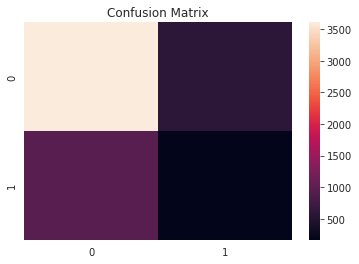

Classification Reprot:

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      4184
           1       0.22      0.15      0.18      1130

    accuracy                           0.71      5314
   macro avg       0.51      0.50      0.50      5314
weighted avg       0.67      0.71      0.69      5314



In [34]:
# Get the predictions on testing data
y_pred =  model_autogluon.predict(X_test)

# Get scores
get_scores(y_test, y_pred)

In [35]:
# Predictions for submission file
preds = model_autogluon.predict(test)

# Generate submission file
generate_submission(model_autogluon, preds)